In [1]:
# Код
from keras.preprocessing.image import ImageDataGenerator

# Подготовка генераторов для обучающего и тестового датасетов
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('bobr_set/bobr_dataset/train/', target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('bobr_set/bobr_dataset/test/', target_size=(64, 64), batch_size=32, class_mode='categorical')



Found 816 images belonging to 2 classes.
Found 403 images belonging to 2 classes.


In [2]:
# Код
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [4]:
# Код
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# Код
model.fit(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10


26/26 [==============================] - 31s 1s/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 9s 339ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 8s 301ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
26/26 [==============================] - 8s 290ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
26/26 [==============================] - 9s 334ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
26/26 [==============================] - 14s 535ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
26/26 [==============================] - 11s 421ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoc

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

13/13 [==============================] - 1s 105ms/step - loss: 0.6931 - accuracy: 0.5000
Test Accuracy: 0.5


In [8]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Инициализация предварительно обученной модели VGG16 без верхних (fully-connected) слоев
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Замораживаем веса предварительно обученной модели
for layer in base_model.layers:
    layer.trainable = False

# Создаем новую модель поверх VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

# Компиляция модели
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Создаем генераторы данных
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('bobr_set/bobr_dataset/train/', target_size=(64, 64), batch_size=64, class_mode='binary')
test_generator = test_datagen.flow_from_directory('bobr_set/bobr_dataset/test/', target_size=(64, 64), batch_size=64, class_mode='binary')

# Добавим EarlyStopping для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Обучение модели
model.fit(train_generator, epochs=2, validation_data=test_generator, callbacks=[early_stopping])

# Оценка производительности
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')


Found 816 images belonging to 2 classes.
Found 403 images belonging to 2 classes.
Epoch 1/2
13/13 [==============================] - 59s 4s/step - loss: 0.2765 - accuracy: 0.9632 - val_loss: 0.1584 - val_accuracy: 0.9677
Epoch 2/2
7/7 [==============================] - 16s 2s/step - loss: 0.1386 - accuracy: 0.9677
Test Accuracy: 0.9677419066429138


1/1 [==============================] - 0s 142ms/step


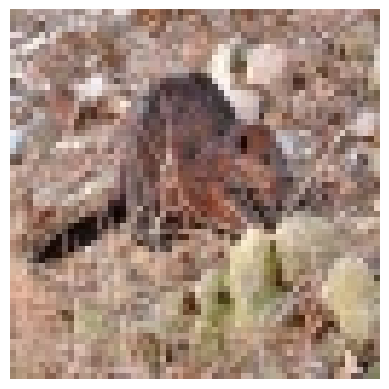

True Label: 1.0, Predicted Label: [1.]
1/1 [==============================] - 0s 140ms/step


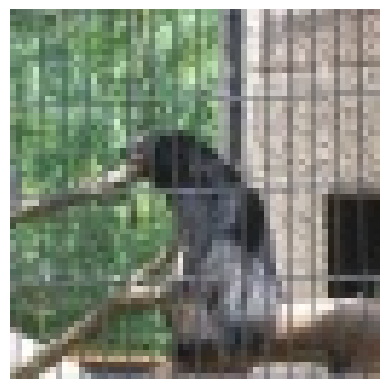

True Label: 1.0, Predicted Label: [1.]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Выбираем два случайных изображения из тестовой выборки
num_images = 2
random_test_images = np.random.choice(len(test_generator), num_images)

for i in random_test_images:
    # Получаем изображение и метку из генератора
    image, true_label = test_generator[i]
    
    # Прогоняем изображение через модель
    predicted_label = model.predict(np.expand_dims(image[0], axis=0))

    predicted_class = predicted_label[0]
    
    # Отображаем изображение
    plt.imshow(image[0])
    plt.axis('off')
    plt.show()
    
    # Выводим метки
    print(f"True Label: {true_label[0]}, Predicted Label: {predicted_class}")
